# Exploratory Data Analysis (EDA)
#### Natural Language Processing Explored

###### Exercises

1. Spam Data

    - a. Load the spam data set.
    - b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - c. Is there any overlap in the bigrams for the spam data and the ham data?
    - d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.         
    
        
2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
nltk.download('wordnet')

from env import user, password, host, get_db_url
import acquire 
from prepare import basic_clean, lemmatize, remove_stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicholasdougherty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***
1. Spam Data

- a. Load the spam data set.
- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- c. Is there any overlap in the bigrams for the spam data and the ham data?
- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data. 

In [2]:
# 1.a): Load the spam data set from Codeup's MYSQL server.
# use UDF to access the database. 

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

# establish connection using a string that matched the desired database
url = get_db_url('spam_db')
# specify the query used in acquisition 
sql = "SELECT * FROM spam"

# create the dataframe using both variables
df = pd.read_sql(sql, url, index_col='id')

# check the first 5 rows. 
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [5]:
# obsolete.
# def clean(text):
#     '''Simplified text cleaning function'''
#     text = text.lower()
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return re.sub(r"[^a-z0-9\s]", '', text)

In [3]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

In [4]:
df.text = df.text.apply(clean)

In [11]:
df.to_csv('spam_clean.csv', index=True, index_label='id')

In [24]:
# obsolete early approach 
#ham_words = clean(' '.join(df[df.label == 'ham'].text))
#spam_words = clean(' '.join(df[df.label == 'spam'].text))
#all_words = clean(' '.join(df.text))
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [25]:
# ham_freq = pd.Series(ham_words.split()).value_counts()
# spam_freq = pd.Series(spam_words.split()).value_counts()
# all_freq = pd.Series(all_words.split()).value_counts()
pd.Series(all_text.split()).value_counts()

u              1197
call            600
2               478
get             397
ur              384
               ... 
dane              1
corrct            1
santha            1
09061743810       1
bitching          1
Length: 8996, dtype: int64

In [26]:
ham_freq = pd.Series(ham_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
all_freq = pd.Series(all_text.split()).value_counts()

In [27]:
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [28]:
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,1197,155,1042
call,600,359,241
2,478,173,305
get,397,83,314
ur,384,144,240
...,...,...,...
happiest,1,0,1
happier,1,0,1
happenin,1,0,1
hanumanji,1,0,1


In [29]:
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])

,all,spam,ham,p_spam,p_ham
',6,0,6,0.0,1.0
'',15,0,15,0.0,1.0
''ok'',5,0,5,0.0,1.0
'an,1,0,1,0.0,1.0
'anything',1,0,1,0.0,1.0
...,...,...,...,...,...
zoe,2,1,1,0.5,0.5
zogtorius,1,0,1,0.0,1.0
zoom,1,0,1,0.0,1.0
zouk,1,1,0,1.0,0.0


<AxesSubplot:>

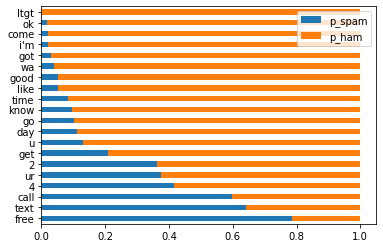

In [30]:
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True)

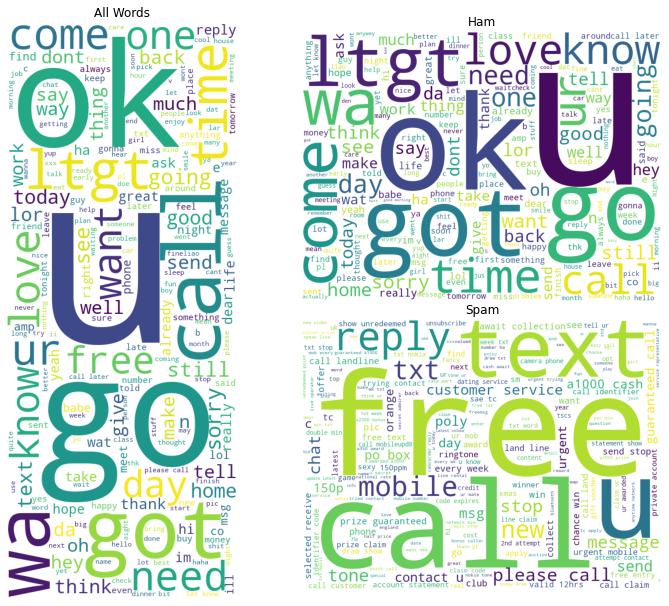

In [31]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(ham_text)
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(spam_text)

plt.figure(figsize=(10, 8))
# start at the origin [0,0] go out to .5 and then vertically all the way up. 
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]
# the following starts at the halway point on the bottom, and then go half right and up .5

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

#### Takeaways:
- Ham texts:
    - Personal pronounces, assertion of self, inquiries, statements of being
- 

In [ ]:
# 1.b): Create and explore bigrams for the spam data. 
#       Visualize them with a word cloud. 
#       How do they compare with the ham bigrams?

In [33]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(please, call)         53
(call, later)          52
(i'll, call)           44
(u, r)                 41
(let, know)            41
(r, u)                 40
(sorry, i'll)          39
(new, year)            32
(good, morning)        31
(wan, 2)               31
(customer, service)    29
(u, know)              27
(u, get)               26
(take, care)           26
(contact, u)           26
(po, box)              25
(guaranteed, call)     23
(a1000, cash)          23
(u, wan)               23
(prize, guaranteed)    22
dtype: int64

<AxesSubplot:>

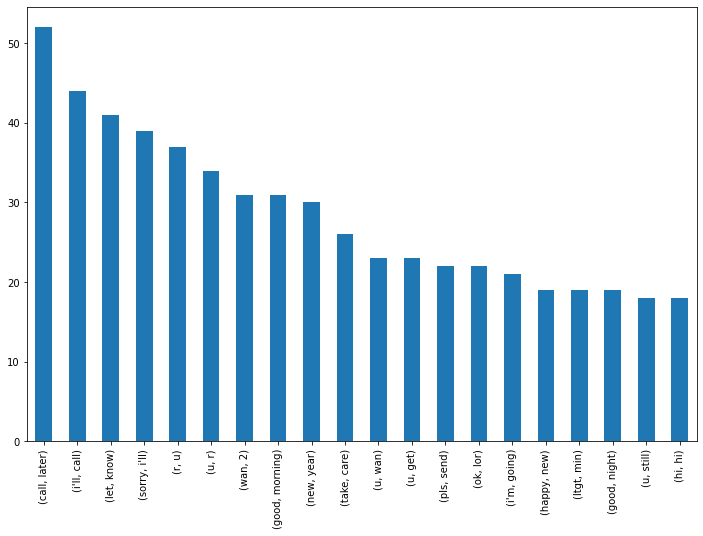

In [34]:
pd.Series(nltk.bigrams(ham_text.split())).value_counts().head(20).plot.bar(figsize=(12,8))

In [35]:
top_20_ham_bigrams = pd.Series(
    (
        nltk.bigrams(
            ham_text.split()
        )
    )).value_counts().head(20)

In [36]:
# Utilizing a dictionary comprehension
# Similar to a list comprehension
# however, messing with keys and values
# so an extra measure specifying what the key is, since we are no longer dealing with indices alone
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}

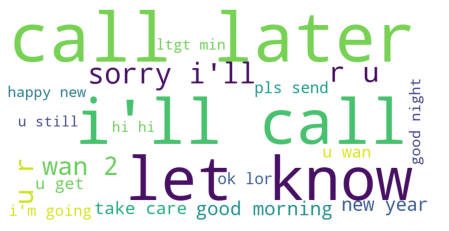

In [37]:
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# but they never called :(


In [11]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()

In [12]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()

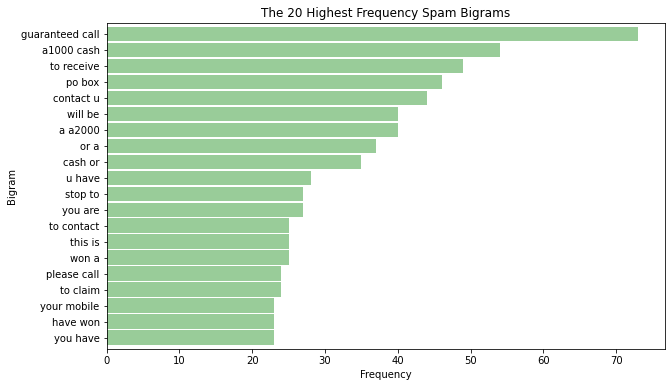

In [17]:
# Visualize the bigrams with barplot
top_20_spam = spam_bigrams.sort_values(ascending=False).head(20)

top_20_spam.sort_values().plot.barh(color='green', alpha=0.4, width=.9, figsize=(10,6))

plt.title('The 20 Highest Frequency Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

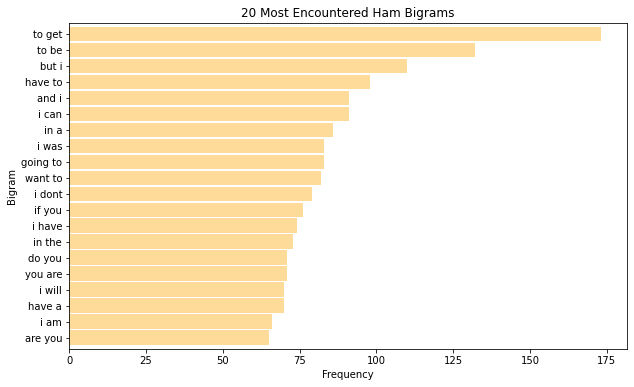

In [18]:
# Visualize the bigrams with barplot
top_20_ham = ham_bigrams.sort_values(ascending=False).head(20)

top_20_ham.sort_values().plot.barh(color='orange', alpha=0.4, width=.9, figsize=(10,6))

plt.title('20 Most Encountered Ham Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

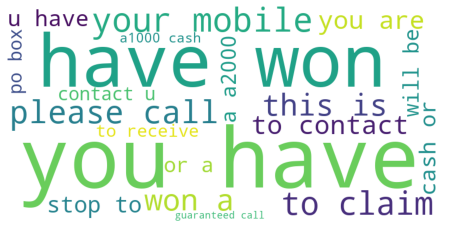

In [21]:
# Visualize spam with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam.to_dict().items()}
img = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

# Live, Laugh, Love lmao

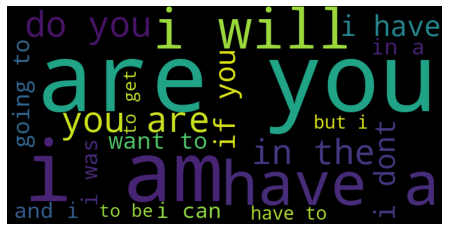

In [22]:
# Visualize ham with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham.to_dict().items()}
img = WordCloud(background_color='black',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# 1.c): Is there any overlap in the bigrams 
#       for the spam data nd the ham data?

Text(0.5, 1.06, 'Ham vs Spam counts among 20 most frequent words')

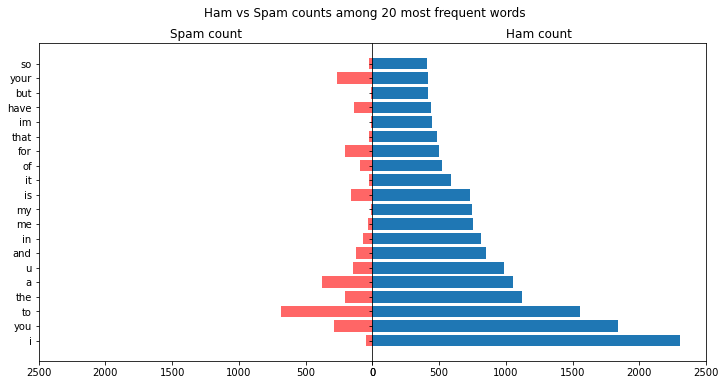

In [25]:
#create fig and subplot
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

# data series
s_ham = word_counts.sort_values('ham', ascending=False).head(20)['ham']
s_spam = word_counts.sort_values('ham', ascending=False).head(20)['spam']

# create the charts
axes[0].barh(s_spam.index, s_spam.values, color = 'red', alpha = 0.6)
axes[1].barh(s_ham.index, s_ham.values)

#invert the first axis
axes[0].invert_xaxis()
axes[0].set_xlim(2500, 0)
axes[1].set_xlim(0, 2500)

# set titles
axes[0].set_title('Spam count')
axes[1].set_title('Ham count')

plt.subplots_adjust(wspace=0)
plt.suptitle('Ham vs Spam counts among 20 most frequent words', y = 1.06)

Takeaways:
- Ham messages are typically framed in the first-person. 
- Spam messages are presumably impersonal and are cut-and-dry.
- 'To', 'a', 'you','the', 'your' have the most overlap between the two. 

In [ ]:
# 1.d): Create and explore with trigrams 
#       (i.e. a n-gram with an n of 3) 
#.      for both the spam and ham data. 

In [38]:
top_20_spam_trigrams1 = (pd.Series(nltk.ngrams(spam_text.split(), 3))
                      .value_counts()
                      .head(20))

In [40]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams1.to_dict().items()}

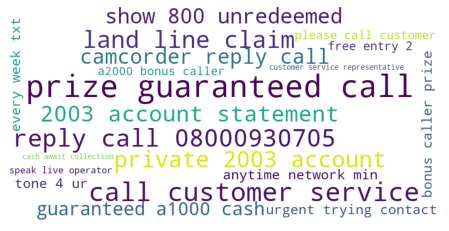

In [41]:
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
##Create the trigrams for ham and spam
#top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20))
#top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20))


In [43]:
#top_20_ham_trigrams.sort_values().plot.barh(color='green', alpha =0.6, width=.9, figsize=(10, 6))
#
#plt.title('20 Most Common Ham Trigrams')
#plt.ylabel('Trigram')
#plt.xlabel('Frequency')

In [44]:
#top_20_spam_trigrams.sort_values().plot.barh(color='red', alpha = 0.5, width=.9, figsize=(10, 6))
#
#plt.title('20 Most Common Spam Trigrams')
#plt.ylabel('Trigram')
#plt.xlabel('Frequency')
#plt.show()

***
***
2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [45]:
codeup_df = acquire.get_blog_articles()

In [36]:
codeup_df.columns

Index(['title', 'published', 'content'], dtype='object')

In [35]:
#codeup_df
# It's working. 

In [15]:
#co_df2 = prepare.prep_article_data(codeup_df, 'content')

In [46]:
codeup_df.content = codeup_df.content.apply(clean)

In [52]:
all_blog = pd.Series(' '.join(codeup_df.content).split())
all_blog_freq = pd.Series(' '.join(codeup_df.content).split()).value_counts()

In [53]:
blog_word_counts = pd.DataFrame(all_blog_freq.sort_values(ascending=False))
blog_word_counts.columns = ['num_occur']
blog_word_counts['word'] = blog_word_counts.index
top_blog_word_counts = blog_word_counts.head(20)
top_blog_word_counts

,num_occur,word
program,58,program
tech,44,tech
hired,44,hired
career,34,career
cloud,33,cloud
...,...,...
certification,23,certification
u,21,u
engineering,21,engineering
associate,20,associate


<AxesSubplot:xlabel='num_occur', ylabel='word'>

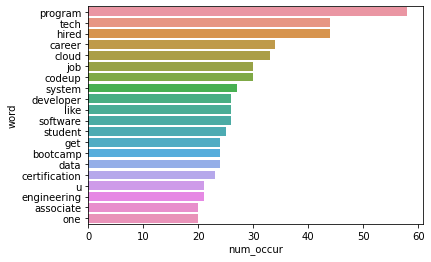

In [54]:
sns.barplot(y = top_blog_word_counts.word, x=top_blog_word_counts.num_occur)

***
***
3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [47]:
news_df = acquire.get_news_articles()

In [32]:
news_df

,category,title,content,author,published
0,business,Rupee hits all-time low of 77.42 against US dollar,"The Indian rupee fell to an all-time low of 77.42 against the US dollar on Monday, Reuters reported. Asian markets were lower on Monday as US stock futures fell on fears of more policy tightening from the Federal Reserve and strict lockdown in Shanghai impacting global growth, according to Reuters.",Apaar Sharma,2022-05-09T05:05:31.000Z
1,business,"Bitcoin falls to the lowest level since January, trades below $34,000","Bitcoin fell on Monday to as low as $33,266 in morning trade, nearing January's low of $32,951 as slumping equity markets continued to hurt cryptocurrencies. It then steadied to trade above $33,600. According to BBC, the world's largest cryptocurrency has fallen by 50% since its peak in November 2021.",Pragya Swastik,2022-05-09T09:20:34.000Z
2,business,Rupee closes at all-time low of 77.50 against US dollar,"The Indian rupee weakened further on Monday to close at a new all-time low of 77.50 against the US dollar, 60 paise over its previous close. During the trading session, the rupee touched its lifetime low of 77.52. The currency was weighed down by elevated crude oil prices and a widening trade deficit.",Pragya Swastik,2022-05-09T15:27:43.000Z
3,business,Made best possible decision: IndiGo on barring differently-abled child from flight,"IndiGo's CEO Ronojoy Dutta said the airline made ""the best possible decision"" by barring a differently-abled teenager and his family from boarding a Ranchi-Hyderabad flight. ""At boarding area, the teenager was visibly in panic...the airport staff, in line with safety guidelines, were forced to make a difficult decision,"" Dutta said. IndiGo offered to purchase an electric wheelchair for the child.",Pragya Swastik,2022-05-09T09:50:34.000Z
4,business,India's biggest IPO of LIC subscribed nearly 3 times on final day of bidding,"LIC's IPO, India's biggest IPO which opened on May 4 and closed on May 9, was subscribed 2.95 times on Monday. Expected to raise ₹20,557 crore, the IPO received bids for 47.83 crore equity shares against the IPO size of 16.2 crore shares. The policyholders' portion was subscribed 6.11 times, employees bid 4.39 times and retail investors bid 1.99 times.\n\n",Pragya Swastik,2022-05-09T14:10:38.000Z
...,...,...,...,...,...
94,entertainment,"People taunted me for not getting pregnant, tried IVF: Sambhavna","Actress Sambhavna Seth has revealed that she has been taunted and age-shamed for not being able to get pregnant even after many years of marriage. Sambhavna and her husband Avinash Dwivedi got married in 2016. ""IVF is one of the ways. Some people might know about it, some might not. We have tried it four times and failed,"" Sambhavna said.",Kriti Kambiri,2022-05-09T11:42:26.000Z
95,entertainment,He's done right thing: Neetu on Ranbir not being on social media,"Actress Neetu Kapoor has said that her son Ranbir Kapoor has done the right thing by not being on any social media platforms. Neetu further said that earlier fans had a craze for celebrities and their personal lives and the urge to see them onscreen was high. Now actors post regular updates and have become way more accessible, she added.",Kriti Kambiri,2022-05-09T15:09:18.000Z
96,entertainment,"Nimrat Kaur shares pic of tattoo, says got it for mom with sister","Actress Nimrat Kaur shared a series of pictures on Instagram showing off her wrist tattoo on Sunday to mark Mother's Day. The actress wrote that she got the tattoo along with her sister Ruby five years ago to celebrate their bond with their mother. ""The idea of an infinity knot symbolising Mama...protecting me and Ruby with her love,"" Nimrat wrote.",Kriti Kambiri,2022-05-09T15:23:03.000Z
97,entertainment,Was worried about being written off due to my South Indian accent: Deepika,"Actress Deepika Padukone said that her South Indian accent was frowned upon and that she was initially worried about being written off. ""As an outsider to the i

In [50]:
news_df.content = news_df.content.apply(clean)

In [51]:
labels = pd.concat([news_df.category.value_counts(),
                    news_df.category.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
business,25,0.252525
sports,25,0.252525
entertainment,25,0.252525
technology,24,0.242424


In [56]:
all_news = ' '.join(news_df.content)
tech_news = ' '.join(news_df[news_df.category == 'technology'].content)
bus_news = ' '.join(news_df[news_df.category == 'business'].content)
sports_news = ' '.join(news_df[news_df.category == 'sports'].content)
ent_news = ' '.join(news_df[news_df.category == 'entertainment'].content)

In [57]:
all_freq = pd.Series(all_news.split()).value_counts()
tech_freq = pd.Series(tech_news.split()).value_counts()
bus_freq = pd.Series(bus_news.split()).value_counts()
sports_freq = pd.Series(sports_news.split()).value_counts()
ent_freq = pd.Series(ent_news.split()).value_counts()

all_freq

said          59
ha            55
wa            44
added         33
musk          25
              ..
english        1
value          1
estimated      1
manchester     1
dutt           1
Length: 1860, dtype: int64

In [58]:
news_word_counts = (pd.concat([all_freq, tech_freq, bus_freq, sports_freq, ent_freq], axis=1, sort=True))\
    .set_axis(['all', 'technology', 'business', 'sports', 'entertainment'], axis=1, inplace=False)
# word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
# word_counts.columns = ['all', 'spam', 'ham']
# word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [59]:
news_word_counts = news_word_counts.fillna(0).apply(lambda s: s.astype(int))
news_word_counts.tail()

,all,technology,business,sports,entertainment
youngest,2,0,0,2,0
yoy,3,0,3,0,0
zealand,1,0,0,1,0
zhao,2,2,0,0,0
zverev,3,0,0,3,0


<AxesSubplot:>

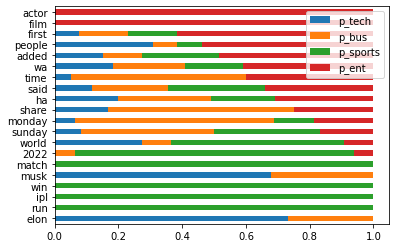

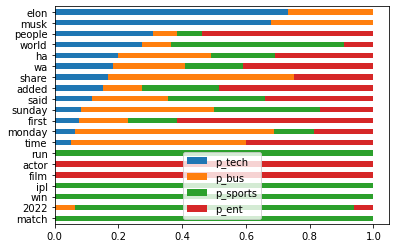

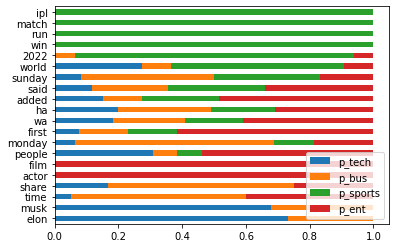

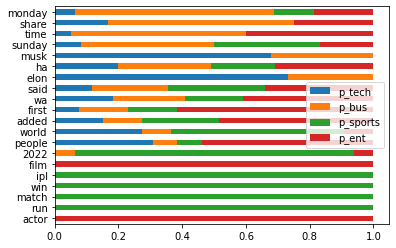

In [60]:
news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_ent')\
                        .plot.barh(stacked=True)
                        

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_tech')\
                        .plot.barh(stacked=True)

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_sports')\
                        .plot.barh(stacked=True)

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_bus')\
                        .plot.barh(stacked=True)

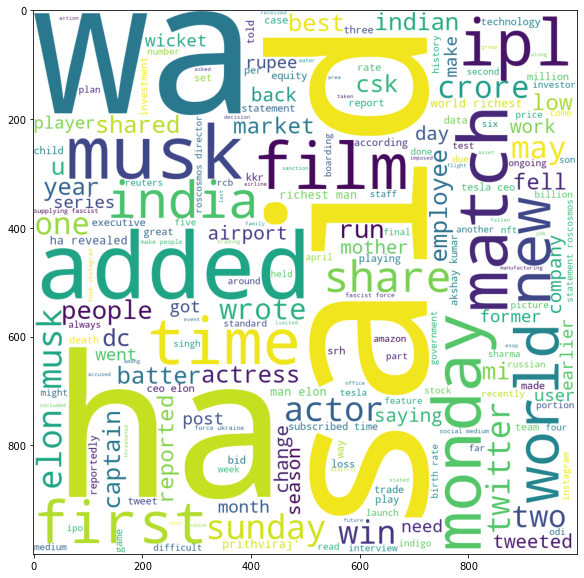

In [61]:
all_news_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(all_news)
plt.figure(figsize=(10, 10))
plt.imshow(all_news_cloud)

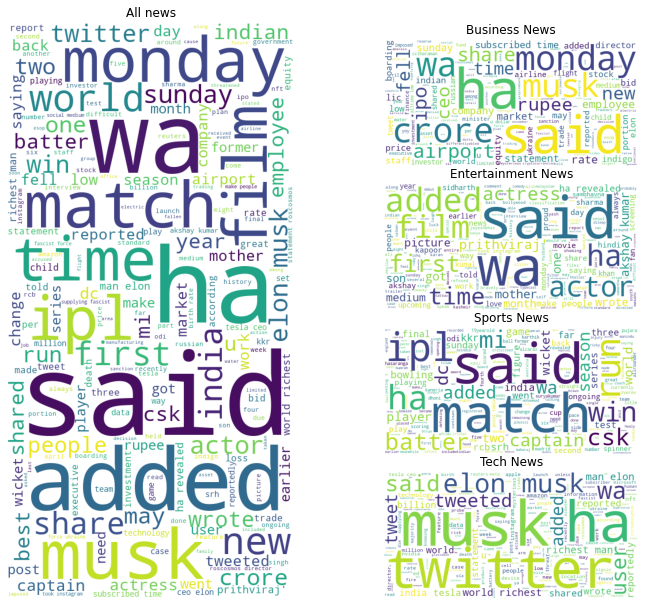

In [62]:
all_news_cloud = WordCloud(background_color='white', height=1000, width=500).generate(all_news)
tech_cloud = WordCloud(background_color='white', height=250, width=500).generate(tech_news)
sports_cloud = WordCloud(background_color='white', height=250, width=500).generate(sports_news)
ent_cloud = WordCloud(background_color='white', height=250, width=500).generate(ent_news)
bus_cloud = WordCloud(background_color='white', height=250, width=500).generate(bus_news)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([0.5, 0, 0.5, 0.22]), plt.axes([.5, .25, .5, .22]), plt.axes([.5, .5, .5, .22]), plt.axes([.5, .75, .5, .22])]

axs[0].imshow(all_news_cloud)
axs[1].imshow(tech_cloud)
axs[2].imshow(sports_cloud)
axs[3].imshow(ent_cloud)
axs[4].imshow(bus_cloud)

axs[0].set_title('All news')
axs[1].set_title('Tech News')
axs[2].set_title('Sports News')
axs[3].set_title('Entertainment News')
axs[4].set_title('Business News')

for ax in axs: ax.axis('off')

In [63]:
top_20_tech_bigrams = (pd.Series(nltk.ngrams(tech_news.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bus_bigrams = (pd.Series(nltk.ngrams(bus_news.split(), 2))
                      .value_counts()
                      .head(20))
top_20_sports_bigrams = (pd.Series(nltk.ngrams(sports_news.split(), 2))
                      .value_counts()
                      .head(20))
top_20_ent_bigrams = (pd.Series(nltk.ngrams(ent_news.split(), 2))
                      .value_counts()
                      .head(20))

In [64]:
top_20_tech_bigrams

(elon, musk)                  8
(world's, richest)            5
(richest, man)                5
(man, elon)                   5
(ceo, elon)                   3
(said, wa)                    3
(44, billion)                 3
(tesla, ceo)                  3
(location, history)           2
(million, subscriber)         2
(tweeted, die)                2
(die, mysterious)             2
(mysterious, circumstance)    2
(circumstance, nice)          2
(nice, knowing)               2
(knowing, ya)                 2
(musk, shared)                2
(statement, roscosmos)        2
(roscosmos, director)         2
(supplying, fascist)          2
dtype: int64

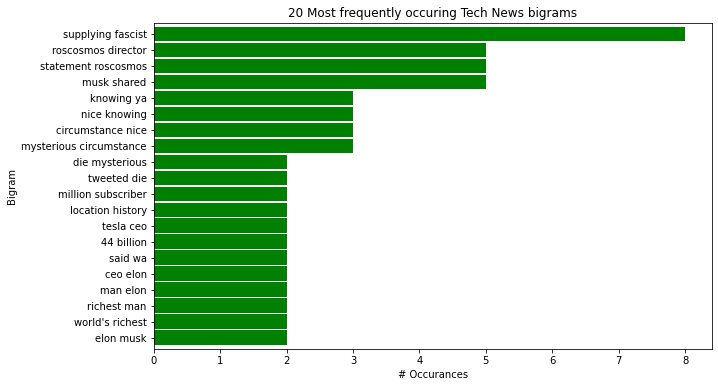

In [65]:
top_20_tech_bigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Tech News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_tech_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

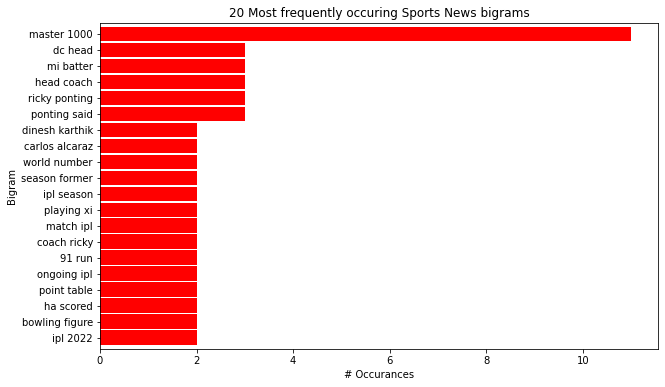

In [66]:
top_20_sports_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Sports News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_sports_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

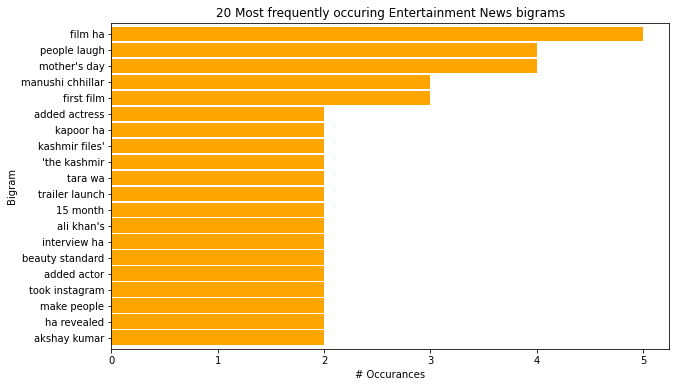

In [67]:
top_20_ent_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Entertainment News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ent_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

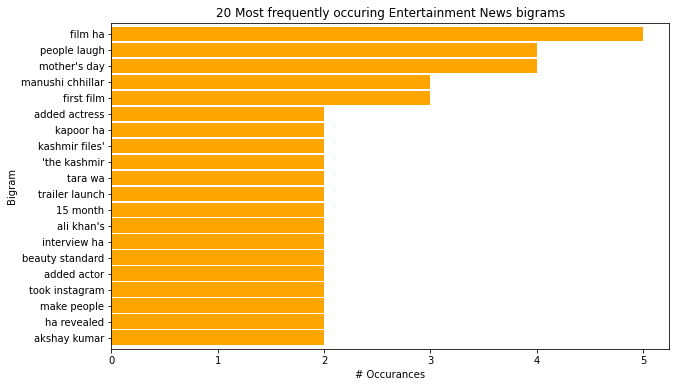

In [68]:
top_20_ent_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Entertainment News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ent_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

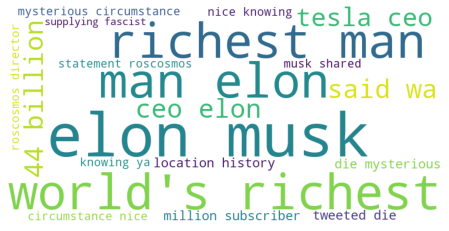

In [69]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

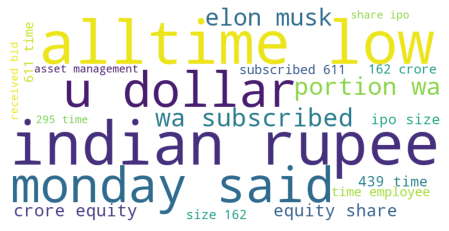

In [70]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bus_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

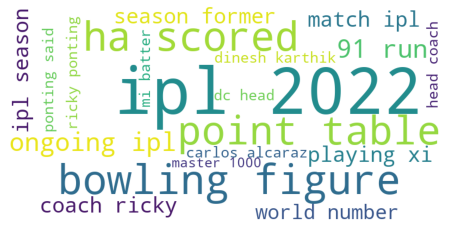

In [71]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

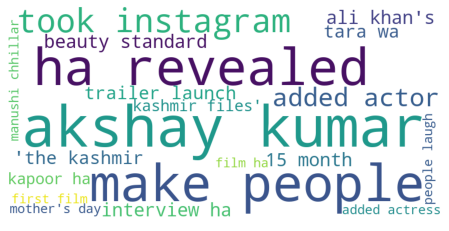

In [72]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ent_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')